# Introduction to the Pandas Package

We have now had some experience with "wrangling" data; that is, taking raw data and putting it into a form which we are able to analyze.

There are packages which can be used to streamline this process. Probably the most popular is the package called `pandas`. Let's explore some data using this package.

In [ ]:
# Import pandas and a couple of other relevant packages
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import random as r

## Loading and Exporing Data

Let's load the dataset called 'galton.csv' from the 'data' folder. Instead of reading the file into a string and manipulating it, `pandas` allows us to read the data immediately into a useable form. The expression type used by `pandas` is called a *dataframe*.

Let's first read the data as we have been doing, then load it into a dataframe using `pandas`.

In [ ]:
# Read the data into a string
f = open('data/galton.csv')
data = f.read()
f.close()

# Take a look at it
data[:1000]

In [ ]:
df = pd.read_csv('data/galton.csv') # Load the data into a dataframe
type(df)

In [ ]:
df.head() # View the first few lines of the dataframe

In [ ]:
df # View the "whole" dataframe

The dataframe is obviously much more readable. The data contains 897 records for children's heights. For each child, we know the mother and father's heights and the child's gender.

Besides immediately giving us a much cleaner way to look at the data, `pandas` has a bunch of functions that will help us explore the data. 

We can get a quick overview of the basic statistics of the data using the function `describe`.

In [ ]:
df.describe()

We can extract various parts of the data frame:

In [ ]:
# Slicing rows
df[5:9]

In [ ]:
# Pulling off columns by name
df.male

In [ ]:
# This syntax does the same thing
df['male']

The expression type of a column is called a 'sequence'. This is similar to a standard Python list, but does have some subtle differences (e.g., it is easier to do vector operations).

In [ ]:
males = df.male
type(males)

In [ ]:
# Take a look at the series
males

We can pull out entries and slice sequences just like we do for lists.

In [ ]:
males[4] 

In [ ]:
males[7:20]

These can be converted to other expression types we have seen.

In [ ]:
males_list = list(males)
males_dict = dict(males)
males_list[2:9]

For a `pandas` sequence, we have the following syntax to apply built-in functions (e.g. `mean`).

In [ ]:
# Compute the mean of the 'male' column
df.male.mean()

In [ ]:
# Compute the standard deviation of the 'male' column
df.male.std()

## Answering Questions About the Data

How do the heights of the fathers compare to the heights of the mothers?

We could ask whether the mean height of the fathers is bigger than the mean height of the mothers.

In [ ]:
df.father.mean() > df.mother.mean()

This is pretty coarse information, though. We could take a more in-depth look at the distributions of heights, say by binning them and looking at a histogram. 

The `.hist()` function produces a histogram plot, which we display using `matplotlib` (which works together very well with `pandas`, in general).

In [ ]:
df.father.hist()
df.mother.hist()
plt.show()

In [ ]:
# The number of bins in the histogram can be specified.
df.father.hist(bins=3)
df.mother.hist(bins=3)
plt.show()

### Exercise

Create a histogram showing the distribution of the number of children per family. Use an appropriate number of bins.

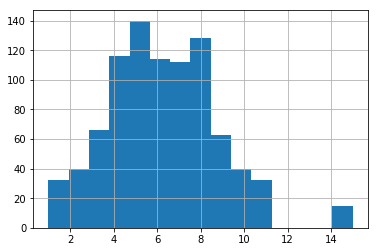

In [39]:
h = df.kids.hist(bins = 15)
plt.show()

## Subsetting



A reason to love `pandas` is that it simplifies certain "data wrangling" tasks.  A common task is taking a subset.

The gender of the child is given by the `gender` column. We can create a series using a conditional.

In [ ]:
df.gender == 'F'

Such a series of Booleans can be used to create a new 'subset' dataframe.

In [ ]:
daughters = df[df.gender == 'F']
daughters.describe()

### Exercise

1) Create histograms of the heights of the mothers and the heights of the daughters and plot on the same axes.

2) Do the same thing for fathers and sons.

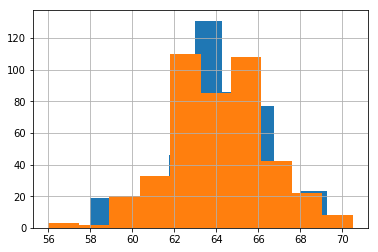

In [188]:
daughters.mother.hist()
daughters.height.hist()

plt.show()

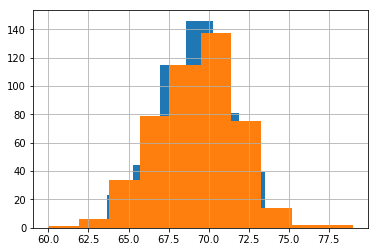

In [189]:
sons = df[df.gender == 'M']
sons.father.hist()
sons.height.hist()
plt.show()

## Aside: More Options for Creating Plots

The result of the above Exercise may be a bit tough to read. It makes more sense to plot the histograms on separate axes as part of one figure. The code below shows how to do something like that.

In [ ]:
# Make a figure here and call it fig.
fig = plt.figure(figsize = (10,5))
# The size can be specified in inches, otherwise it goes to a default size.
# The syntax is figsize = (width, height)

# Add subplots to the figure
hist1 = fig.add_subplot(1,2,1)
# The syntax (1,2,1) means: break the figure into a 1x2 grid, hist1 goes in the first slot
# The 1x2 grid should be read like matrix dimensions: 1 high and 2 wide.
hist2 = fig.add_subplot(1,2,2)
# Put hist2 in the second slot.

plt.show()

In [ ]:
# Now let's create such a figure with the histograms for mothers and children plotted

fig = plt.figure(figsize = (10,5))

hist1 = fig.add_subplot(1,2,1)
hist1.hist(daughters.mother) # Add histogram to the subplot
plt.title('Mother Heights') # Add a title

hist2 = fig.add_subplot(1,2,2)
hist2.hist(daughters.height)
plt.title('Daughter Heights')

plt.show()

### Exercise

Create a figure with 4 histograms of heights of all fathers, sons, all mothers and daughters, arranged however you like. 

In [ ]:
fig = plt.figure(figsize = (10,10))

hist1 = fig.add_subplot(2,2,1)
hist1.hist(df.mother) 
plt.title('Mother Heights') 

hist2 = fig.add_subplot(2,2,2)
hist2.hist(daughters.height)
plt.title('Daughter Heights')

hist3 = fig.add_subplot(2,2,3)
hist3.hist(df.father) 
plt.title('Father Heights') 

hist4 = fig.add_subplot(2,2,4)
hist4.hist(sons.height)
plt.title('Son Heights')

plt.show()

## Scatter plots



One feature of `pandas` is how accessible it makes the usual
&ldquo;exploratory&rdquo; tools like scatterplots.  Indeed, when you are working
with data, ****first look at your data**** and some scatterplots are a
reasonable way to do this.

We could plot the father&rsquo;s height on the $x$-axis and the child&rsquo;s eventual height on the $y$-axis.



In [ ]:
df.plot.scatter('father', 'height')
plt.show()

### Exercise

1) Make a scatterplot with the mother's height on the $x$-axis and the child's height on the $y$-axis.

2) Make a scatterplot with the father's height on the $x$-axis and the mother's height on the $y$-axis.

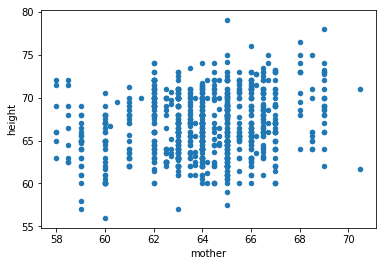

In [191]:
df.plot.scatter('mother', 'height')
plt.show()

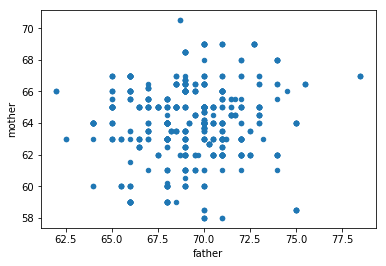

In [192]:
df.plot.scatter('father','mother')
plt.show()

Another useful feature of  `pandas` is that it permits various calculations to be performed on the rows.  Let's add a column to our data frame which is the average the heights of the two parents.



In [ ]:
df['midparent'] = (df.father + df.mother)/2

In [ ]:
df.head()

Now we could plot the midparent height on the $x$-axis instead.



In [ ]:
df.plot.scatter('midparent', 'height')
plt.show()

## Making predictions



Can we use Galton&rsquo;s data to predict the height of a child based on the
average height of his/her parents?

There are various ways to do this.  Perhaps the first thing to think
to do is the following: to predict the height of a child whose
midparent height is $x$, let&rsquo;s look at &ldquo;neighbors&rdquo; meaning rows
in the data frame where the midparent height is close to $x$.



In [ ]:
def neighbors(x):
    return df[ abs(df['midparent'] - x) < 2 ]

In [ ]:
# Test
neighbors(70).head()

Once we have some &ldquo;neighbors,&rdquo; we can look at their average height.



In [ ]:
def prediction(x):
    return neighbors(x).height.mean()

In [ ]:
# Test
x = 70
print('A child with midparent height '+str(x)+' is predicted to have height '+str(prediction(x)))

Now let&rsquo;s plot our predictions.  Because `pandas` is built on
`matplotlib` it is easy to combine plots from different sources.



In [ ]:
# Recreate the scatterplot
df.plot.scatter('midparent', 'height')
# Define a domain to plot the prediction function against. 
# We sample a relevant interval of heights
xs = np.linspace( df.midparent.min(), df.midparent.max(), 100 )
# Plot the prediction against the domain
plt.plot(xs, [prediction(x) for x in xs])
# Show both plots
plt.show()

That 'prediction line' is wiggly, but certainly looks like a line!

### Exercise

Create similar plots of predictions for 'father' versus 'height' and 'mother' versus 'height'. How do the results compare?

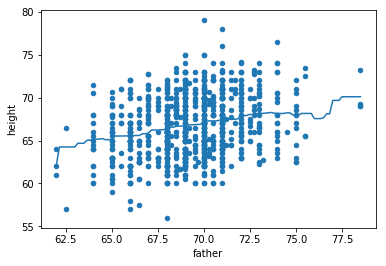

In [66]:
def neighbors_father(x):
    return df[ abs(df['father'] - x) < 2 ]

def prediction_father(x):
    return neighbors_father(x).height.mean()

df.plot.scatter('father', 'height')

xs = np.linspace( df.father.min(), df.father.max(), 100 )

plt.plot(xs, [prediction_father(x) for x in xs])

plt.show()

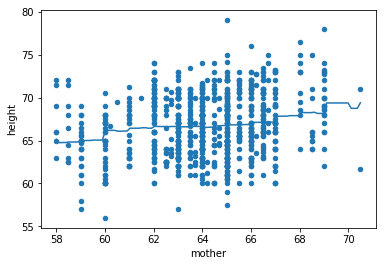

In [67]:
def neighbors_mother(x):
    return df[ abs(df['mother'] - x) < 2 ]

def prediction_mother(x):
    return neighbors_mother(x).height.mean()

df.plot.scatter('mother', 'height')

xs = np.linspace( df.mother.min(), df.mother.max(), 100 )

plt.plot(xs, [prediction_mother(x) for x in xs])

plt.show()

## Correlation

Our prediction tells us that `midparent` and `height` are roughly linearly related. Can we quantify how closely this holds to being true? Indeed, we can boil this down to a number  called the *(sample) correlation coefficient*. 

To make this precise, let $X = \{x_1,\ldots,x_n\}$ and $Y = \{y_1,\ldots,y_n\}$ be sets of data. Suppose we wish to quantify the extent to which the points $y_j$ are determined by some linear function of the $x_j$; i.e., whether there exists a linear function $f(x) = m \cdot x + b$ such that $y_j \approx f(x_j)$ for all $j = 1,\ldots n$. 

The *correlation coefficient* $r = r_{X,Y} \in [-1,1]$ is given by
$$
r = \frac{\sum_{j=1}^n (x_j - \mu_X) (y_j - \mu_Y)}{\left(\sum_{j=1}^n (x_j - \mu_X)^2 \sum_{j=1}^n (y_j - \mu_Y)^2\right)^{1/2}},
$$
where $\mu_X$ and $\mu_Y$ denote the mean values of $X$ and $Y$, respectively.

To get a feel for what this quantity is describing, let's write a function to compute it, then try it on some examples.

In [ ]:
# We will define our function to take X and Y as lists. 

# First define the mean function
def mean(X):
    return sum(X)/len(X)

# The centering function is another useful intermediate function.
def center(X,a):
    return [x - a for x in X]

from math import sqrt
# Now define the correlation. 
# Note the trick using numpy arrays here!
def correlation(X,Y):
    centeredX = center(X,mean(X))
    centeredY = center(Y,mean(Y))
    numerator = sum(np.array(centeredX)*np.array(centeredY))
    denominator = sqrt(sum([x**2 for x in centeredX])*sum([y**2 for y in centeredY]))
    return numerator/denominator

Now let's construct some artificial data sets and check the correlation coefficient.

In [ ]:
X1 = np.linspace(0, 1, 100 )
m = 8 # This can be adjusted. Does it effect the result?
b = 2
Y1 = [m*x + b for x in X1]

plt.plot(X1,Y1)
correlation(X1,Y1)

In [ ]:
X2 = np.linspace(0, 1, 100 )
m = -10
b = 75
Y2 = [m*x + b for x in X2]

plt.plot(X2,Y2)
correlation(X2,Y2)

The above results make sense. If it is the case that there exist $m$ and $b$ such that $y_j = m\cdot x_j + b$ for all $j$, then we have
\begin{align*}
\mu_Y &= \frac{1}{n} \sum_j y_j \\
&= \frac{1}{n} \sum_j (m x_j + b) \\
&= \frac{1}{n} \sum_j m x_j + \frac{1}{n} \sum_j b \\
&= m \mu_X + b.
\end{align*}
It follows that 
$$
y_j - \mu_Y = mx_j + b - (m \mu_X + b) = m(x_j - \mu_X).
$$
Finally, we have
\begin{align*}
r &= \frac{\sum_{j=1}^n (x_j - \mu_X) (y_j - \mu_Y)}{\left(\sum_{j=1}^n (x_j - \mu_X)^2 \sum_{j=1}^n (y_j - \mu_Y)^2\right)^{1/2}} \\
&= \frac{m \sum_{j=1}^n (x_j - \mu_X)^2}{\left|m\right|\sum_{j=1}^n (x_j - \mu_X)^2} \\
&= \frac{m}{\left|m\right|} = \pm 1.
\end{align*}

Let's try it for some other toy datasets.

In [ ]:
X3 = np.linspace(0, 1, 100 )
noise_factor = 0.5
m = 2
b = 10
Y3 = [m*x + b + noise_factor*(1/2)*(r.random()-r.random()) for x in X3]
# Note the trick for producting a random number in [-1,1]

plt.scatter(X3,Y3)
correlation(X3,Y3)

In [ ]:
X4 = [r.random() for x in range(100)]
Y4 = [r.random() for x in range(100)]

plt.scatter(X4,Y4)
correlation(X4,Y4)

So correlation is low for an unstructured point cloud. On the other hand, it is still low for a *structured* point cloud if the structure is not a linear relationship!

The data below is perfectly related by a quadratic function, but the correlation is essentially zero.

In [ ]:
X5 = np.linspace(-1, 1, 100 )
m = 2
b = 10
Y5 = [m*x**2 + b for x in X5]

plt.scatter(X5,Y5)
correlation(X5,Y5)

## Correlation for the Height Data

Let's check the correlation between 'midparent' and 'height' in the Galton dataset.

In [ ]:
correlation(df['midparent'],df['height'])

Of course, this is the sort of thing that should be built into a package like `pandas` already. Indeed it is, and we can compute correlations between any pair of columns. 

In [ ]:
df[['father','mother','midparent','height']].corr()

This shows that 'midparent' has the highest correlation with 'height'!

# Another Data Set and Other Visualization Methods

Let's take a look at one more dataset to see some other things that `pandas` can do. The next dataset contains information about customer bills and tips over some span of time at a restaurant.

In [ ]:
df=pd.read_csv('data/tips.csv')
df.head()

Besides looking at the start of the dataframe, we can look at the end or a random sample.

In [ ]:
df.tail()

In [ ]:
df.sample(5)

In [ ]:
# Look at a summary of the dataset
df.describe()

We can also create new dataframes by grouping according to different columns. We can specify which values should then be displayed in the columns.

In [ ]:
df2 = df.groupby('day').count()
df2

In [ ]:
df3=df.groupby('day').sum() # sum per day
df3

We can also remove a column from our data frame. Below we remove the 'size' column and add a new column containing the percentage of the tip.

In [ ]:
df3.drop('size',inplace=True,axis=1) # sum of size column is not relevant
df3['percent'] = df3['tip']/df3['total_bill']*100 # add percents
df3

We can also group the dataframe by multiple categories.

In [ ]:
# Group by day and table size
df4= df.groupby(['day','size']).sum()
df4['percent'] = df4['tip']/df4['total_bill']*100
df4

Let's look at some other methods to visualize this data. Another powerful package for data visualization, based on `matplotlib`, is called `seaborn`. Let's import it and try out the function `countplot`.

In [ ]:
# Visualize using Seaborn
import seaborn as sb
sb.countplot(x='day' ,data=df)
plt.show()

We can 'split' the countplot as follows.

In [ ]:
sb.countplot(x='day',hue='size' ,data=df)
plt.show()

In [ ]:
sb.countplot(x='day',hue='smoker' ,data=df)
plt.show()

The `seaborn` package can do some pretty fancy stuff. The example below shows a plot generated from the `iris` dataset, which can be loaded directly from the `seaborn` package.

In [ ]:
sb.set(style="darkgrid")
iris = sb.load_dataset("iris")

# Subset the iris dataset by species
setosa = iris[iris.species == 'setosa']
virginica = iris[iris.species == 'virginica']

# Set up the figure
f, ax = plt.subplots(figsize=(8, 8))
ax.set_aspect("equal")

# Draw the two density plots
ax = sb.kdeplot(setosa.sepal_width, setosa.sepal_length,
                 cmap="Reds", shade=True, shade_lowest=False)
ax = sb.kdeplot(virginica.sepal_width, virginica.sepal_length,
                 cmap="Blues", shade=True, shade_lowest=False)

# Add labels to the plot
red = sb.color_palette("Reds")[-2]
blue = sb.color_palette("Blues")[-2]
ax.text(2.5, 8.2, "virginica", size=16, color=blue)
ax.text(3.8, 4.5, "setosa", size=16, color=red);

### Exercise/Homework

Explore the `iris` dataset using `pandas` and/or `seaborn`. Can you find any interesting trends or relationships?

Examples of stuff you can do with `seaborn` can be found here: https://seaborn.pydata.org/examples/index.html

Some other datasets that you can load through `seaborn` are listed here: https://github.com/mwaskom/seaborn-data. Find one that you find interesting and analyze it!

In [104]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


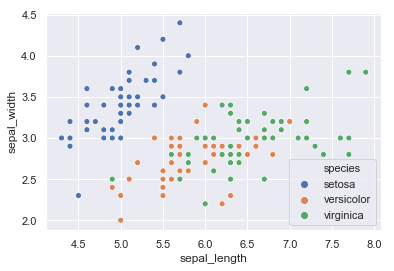

In [117]:
sb.scatterplot(x="sepal_length", y="sepal_width",
                hue="species", data=iris)

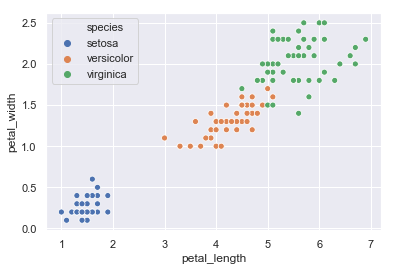

In [119]:
sb.scatterplot(x="petal_length", y="petal_width",
                hue="species", data=iris)

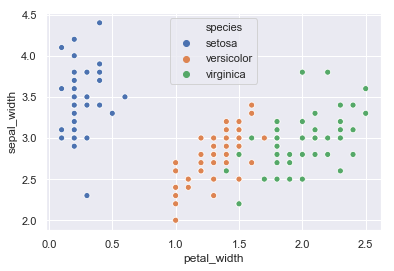

In [120]:
sb.scatterplot(x="petal_width", y="sepal_width",
                hue="species", data=iris)

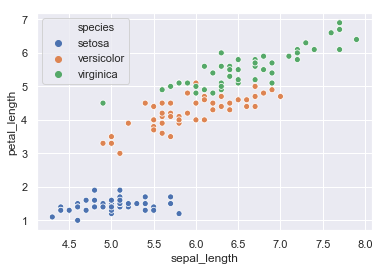

In [121]:
sb.scatterplot(x="sepal_length", y="petal_length",
                hue="species", data=iris)